In [1]:
import platform
import pandas as pd
import numpy as np
v = platform.python_version_tuple();
if float(v[1]) < 10:
    raise Exception("MUST USE Python 3.10 to use MATCH expression!")

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
import sys;
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_colwidth = 1000


In [2]:
from enum import Enum, unique

@unique
class PDataType(Enum):
    NUMERICAL = 1
    CATHEGORICAL = 2

def remove_distinct_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

def get_data_type(df, type):
    match type:
        case PDataType.NUMERICAL:
            return df.select_dtypes(np.number);
        case PDataType.CATHEGORICAL:
            return df.select_dtypes(include='object');

#select all cathegorigal data where the first value is more than percent%?
def get_cathegorical_data_by_percent(df, percent):
    col_names = get_data_type(df,PDataType.CATHEGORICAL)
    to_return = []
    for col_name in col_names:
        unique_v_df = (df[col_name].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        if unique_v_df.iloc[0].percent > percent:
            to_return.append(col_name);
    return to_return
    
def fill_empty_data_with(df, type, filler):
    col_names = get_data_type(df,type)
    for c in col_names:
        test_data_csv[c] = test_data_csv[c].fillna(filler)

In [3]:
DO_NOT_PLOT = True

In [4]:
#define Seaborn color palette to use
import numpy as np
from math import ceil
from itertools import zip_longest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_pie_for_unique_category(df,col_name_x, ax):
    if not DO_NOT_PLOT:
        colors = sns.color_palette('pastel')
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}", ax = ax)


def plot_hist_for_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        fig, axs = plt.subplots(nrows=len(unique_v_df), figsize=(16,10))
        i = 0;
        for index, row in unique_v_df.iterrows():
            value_percent = row.iloc[1];
            value = row.iloc[0];
            name = index;
            sns.histplot(data=df.loc[df[col_name_x] == name], x=col_name_y, ax = axs[i],bins=100, label =f'{col_name_x} {name} : {value} | {value_percent:.2f}%')
            axs[i].set_xlim(df[col_name_y].min(), df[col_name_y].max())
            axs[i].legend()
            i+=1
        fig.suptitle(f"{col_name_x} on {col_name_y}")
        plt.show()
        
def plot_hist_for_unique_category_stat(df,col_name_x,col_name_y, stat = 'count'):
    if not DO_NOT_PLOT:
        sns.histplot(data=df, x=col_name_x, stat = stat)
        plt.legend()
        plt.show()
                     
    
def plot_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        plot_hist_for_unique_category(df,col_name_x,col_name_y)
        fig, axs = plt.subplots(1, 2, figsize=(10,10))
        fig.tight_layout()
        plot_pie_for_unique_category(df,col_name_x,axs[0])
        sns.boxenplot(data=df, x=col_name_x, y=col_name_y, ax = axs[1])
        plt.show()
    
def plot_hist_for_unique_category_array(df,col_names_x,col_name_y):
    if not DO_NOT_PLOT:
        for col_name_x in col_names_x:
            plot_hist_for_unique_category(df,col_name_x,col_name_y)
            plt.show()

#RAVEL returns flatted array, depricated. use to_numpy
def plot_pie_for_unique_category_array(df,col_names_x):
    if not DO_NOT_PLOT:
        n_rows, n_cols = ceil(len(col_names_x) / 3), 3
        fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 80))
        for col_name_x,ax in zip_longest(col_names_x,axs.ravel()):
            if col_name_x is not None:
                colors = sns.color_palette('pastel')
                unique_v_df = (df[col_name_x].value_counts()).to_frame()
                unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
                unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}",ax=ax )
            else:
                fig.delaxes(ax)
        plt.draw()
        plt.tight_layout()
    

def plot_correlation_for(df, col_name, n):
    corr = df.corr(numeric_only=True)[col_name].sort_values(ascending=False)
    top_corr = corr[1:n]
    selected_features = list(top_corr.index) + [col_name]
    correlation_matrix = df[selected_features].corr()
    mask = np.triu(correlation_matrix)
    if not DO_NOT_PLOT:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", vmin=-1, vmax=1,mask=mask)
    
        plt.title(f"Top of correlation with{col_name}", fontsize=16)
        plt.show()
    return top_corr


# HOMEWORK

The project (homework) task for you will be to gather all the above and prepare a regression model with various features related to a real dataset.


**Multivariate regression case**

In fact, we can treat polynomial regression as the case of the multivariate regression, where the first variable is $x$, the second variable is $x^2$, the third variable is $x^3$. Our regression model is simply:
$$\hat{y} = f(x,x^2,x^3)$$

In your homework you are asked to work with the real multivariate regression case, where analogously:
$$\hat{y} = f(x_1,x_2,x_3,\dots,x_{13})$$

The arguments $x_1,x_2,x_3,\dots,x_{13}$ we use to infer are known as *features*. Their selection and processing (feature engineering) with be subject of other lecture(s) and laboratory classe(s)

You can use any dataset you select. For instance, Scikit-learn offers some exemplary datasets. Before, you worked with the historical dataset related to house prices. Here, you can play with the diabetes data (although if you want, you can use some other dataset interesting for you).

Process the selected dataset, using the following concept:

*   Review the data carefully, pre-process as much as possible. The `diabetes` dataset can be quite nice, but at least some of the features can be correlated.
*   `train_test_split`: treat the case as the supervised learning example, i.e., train with a data subset and then check its quality (score) with another subset of your data.
*   `Pipeline`: use a pipeline, where you first transform the data.
*   Consider simple multivariate regression, but also play with squares, values obtained as mutliplication of two variables, etc.

[If you want to, you can also consider the following, but we have not managed to do that this time:
*   `Lasso`/`Ridge`: second, use linear (or polynomial) regression with regularization (choose L1- or L2-regularization).
*   `GridSearchCV`: use gridsearch to select the $\lambda$ parameter for regularization.
*   `KFold`: Select the $\lambda$ hyperparameter with $k$-fold cross-validation.]

We will see who is able to obtain the best fit without overfitting!

**This homework is obligatory. Please send colab link to piotr.cholda@agh.edu.pl before 22.03.2023.**

In [5]:
!pip install ucimlrepo

In [6]:
# https://archive.ics.uci.edu/dataset/320/student+performance

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
 
print(X.info()) 
print(X.describe()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
print(student_performance) 

{'data': {'ids': None, 'features':     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... higher 

In [8]:
print(y.info()) 
print(y.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      649 non-null    int64
 1   G2      649 non-null    int64
 2   G3      649 non-null    int64
dtypes: int64(3)
memory usage: 15.3 KB
None
               G1          G2          G3
count  649.000000  649.000000  649.000000
mean    11.399076   11.570108   11.906009
std      2.745265    2.913639    3.230656
min      0.000000    0.000000    0.000000
25%     10.000000   10.000000   10.000000
50%     11.000000   11.000000   12.000000
75%     13.000000   13.000000   14.000000
max     19.000000   19.000000   19.000000


In [9]:

# variable information 
variables_df = student_performance.variables.copy()
#variables_df = variables_df.drop(columns = ['units','missing_values'])
name_description_df = variables_df[['name','description']].copy()


In [10]:
print(student_performance.data.features.describe())
print(student_performance.data.features.info())


              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

In [11]:
data_f = student_performance.data.features.copy()
targets_f = student_performance.data.targets.copy()



Concatenate target and data to get full view

In [12]:
df = pd.concat([data_f, targets_f], axis =1)


In [13]:
more_than_90 = []
for i in range(90,99,5):
    more_than = get_cathegorical_data_by_percent(df,i);
    for x in more_than:
        more_than_90.append(x) 
more_than_90 = list(set(more_than_90))
#plot_pie_for_unique_category_array(test_data_csv, more_than_90)
#for column in more_than_90:
#    plot_unique_category(test_data_csv, column,'SalePrice');
#drop those columns at all?
plot_pie_for_unique_category_array(df, more_than_90)
[ print(name_description_df[name_description_df['name'] == x].description) for x in more_than_90]


17    extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
Name: description, dtype: object


[None]

In [14]:
number_cols = get_data_type(df,PDataType.CATHEGORICAL)
plot_pie_for_unique_category_array(df, number_cols.columns.to_numpy())

In [15]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() 
col_names = get_data_type(df,PDataType.CATHEGORICAL)
for col in col_names:
    df[col] = label_encoder.fit_transform(df[col])

In [16]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   famsize     649 non-null    int64
 5   Pstatus     649 non-null    int64
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int64
 9   Fjob        649 non-null    int64
 10  reason      649 non-null    int64
 11  guardian    649 non-null    int64
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int64
 16  famsup      649 non-null    int64
 17  paid        649 non-null    int64
 18  activities  649 non-null    int64
 19  nursery     649 non-null    int64
 20  higher      649 non-null    int6

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.696456,0.295840,0.876733,2.514638,2.306626,1.941448,2.224961,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,1.248317,0.863487,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [17]:
feature = 'G1'
feature_correlation = plot_correlation_for(df, feature, 10)
print(feature_correlation)

G2           0.864982
G3           0.826387
higher       0.349030
studytime    0.260875
Medu         0.260472
Fedu         0.217501
Mjob         0.181551
address      0.157127
reason       0.155556
Name: G1, dtype: float64


Fedu and Medu

In [18]:
feature = 'G2'
feature_correlation = plot_correlation_for(df, feature, 10)
print(feature_correlation)

G3           0.918548
G1           0.864982
higher       0.331953
Medu         0.264035
studytime    0.240498
Fedu         0.225139
reason       0.157459
address      0.154600
Mjob         0.153875
Name: G2, dtype: float64


In [19]:
feature = 'G3'
feature_correlation = plot_correlation_for(df, feature, 10)
print(feature_correlation)

G2           0.918548
G1           0.826387
higher       0.332172
studytime    0.249789
Medu         0.240151
Fedu         0.211800
address      0.167637
internet     0.150025
Mjob         0.148252
Name: G3, dtype: float64


Medu        Fedu      0.647477
Walc        Dalc      0.616561
Mjob        Medu      0.459337
Walc        goout     0.388680
freetime    goout     0.346352
sex         Walc      0.320785
failures    age       0.319968
Fedu        Mjob      0.290703
Dalc        sex       0.282696
guardian    age       0.266830
internet    Medu      0.266052
            Mjob      0.260658
traveltime  school    0.252936
goout       Dalc      0.245126
higher      Medu      0.213896
Fedu        Fjob      0.211604
Fjob        Mjob      0.202651
higher      Fedu      0.191735
address     Medu      0.190320
dtype: float64


<Axes: >

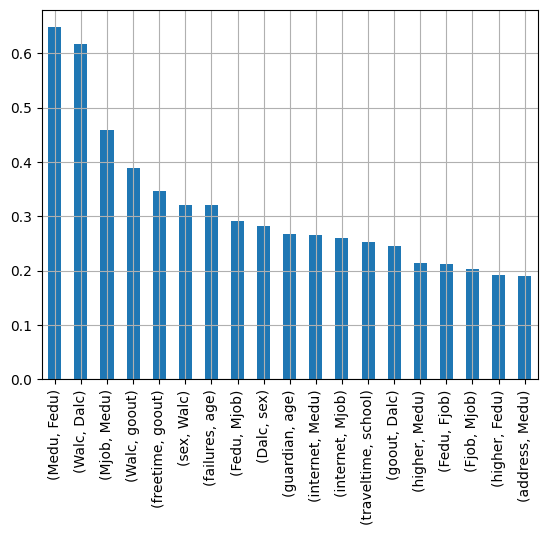

In [20]:
df_no_target = df.copy().drop(columns = targets_f.columns)
n_count = 20
top_correlation = df_no_target.corr().unstack().sort_values(ascending = False).drop_duplicates()[1:n_count]
print(top_correlation)
top_correlation.plot.bar(grid = True)

In [21]:
print()
correletion_features_n = 5
for x in range(correletion_features_n):
    f,s = top_correlation.index[x]
    print("Correlation of:")
    print(f"{f} - {name_description_df[name_description_df['name'] == f].description}") 
    print(f"{s} - {name_description_df[name_description_df['name'] == s].description}") 
    print("!@!@!@!@!@"*5)





Correlation of:
Medu - 6    mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
Name: description, dtype: object
Fedu - 7    father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
Name: description, dtype: object
!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@
Correlation of:
Walc - 27    weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
Name: description, dtype: object
Dalc - 26    workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Name: description, dtype: object
!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@!@
Correlation of:
Mjob - 8    mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Name: description, dtype: object
Medu - 6    mother's education (numeric: 0 - no

First try tu build a ML model with raw data

OneHot Encoders not needed as I already converted it into numerica values.

In [55]:
X = simple_model.copy().drop(columns = 'G3')
y = simple_model.copy()['G3']
print(X.info())
print(y.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   famsize     649 non-null    int64
 5   Pstatus     649 non-null    int64
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int64
 9   Fjob        649 non-null    int64
 10  reason      649 non-null    int64
 11  guardian    649 non-null    int64
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int64
 16  famsup      649 non-null    int64
 17  paid        649 non-null    int64
 18  activities  649 non-null    int64
 19  nursery     649 non-null    int64
 20  higher      649 non-null    int6

In [56]:
print(y.head())

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64


In [91]:
 from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree

In [92]:
def scikit_model_vis(y_valid, y_pred):
    plt.figure()
    plt.scatter(y_valid, y_pred)
    plt.xlabel('ground truth (y_valid)')
    plt.ylabel('predict (y_pred)')
    plt.show()

    print(f'MAE: {metrics.mean_absolute_error(y_valid, y_pred):.2f}')
    print(f'MSE: {metrics.mean_squared_error(y_valid, y_pred):.2f}')
    print(f'R2: {metrics.r2_score(y_valid, y_pred):.2f}')

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

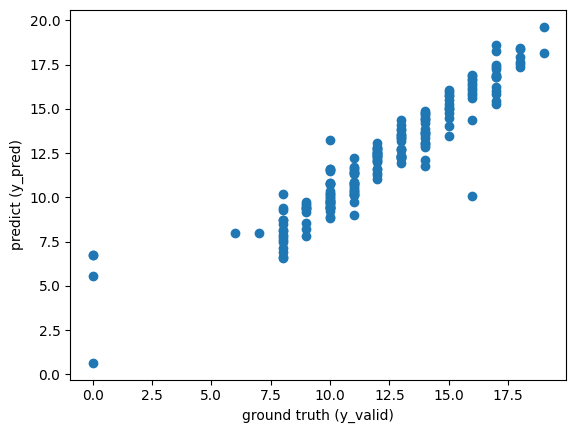

MAE: 0.77
MSE: 1.46
R2: 0.87
Score : 0.8332477826626934


In [110]:
pipe_lr=Pipeline([
                 ('pca',PCA(n_components=3)),
                 ('lf',LinearRegression())])

pipe_lr.fit(X_train,y_train)
y_pred = reg_orig.predict(X_test)
scikit_model_vis(y_test, y_pred)
print(f"Score : {pipe_lr.score(X_test,y_test)}")